<a href="https://colab.research.google.com/github/ubd99/Programming_for_AI_FA25/blob/main/Lab_3_Informed_Searches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Represent the following Tree using Python Dictionary Data Structure and  Apply Greedy Best First Search Algorithm**


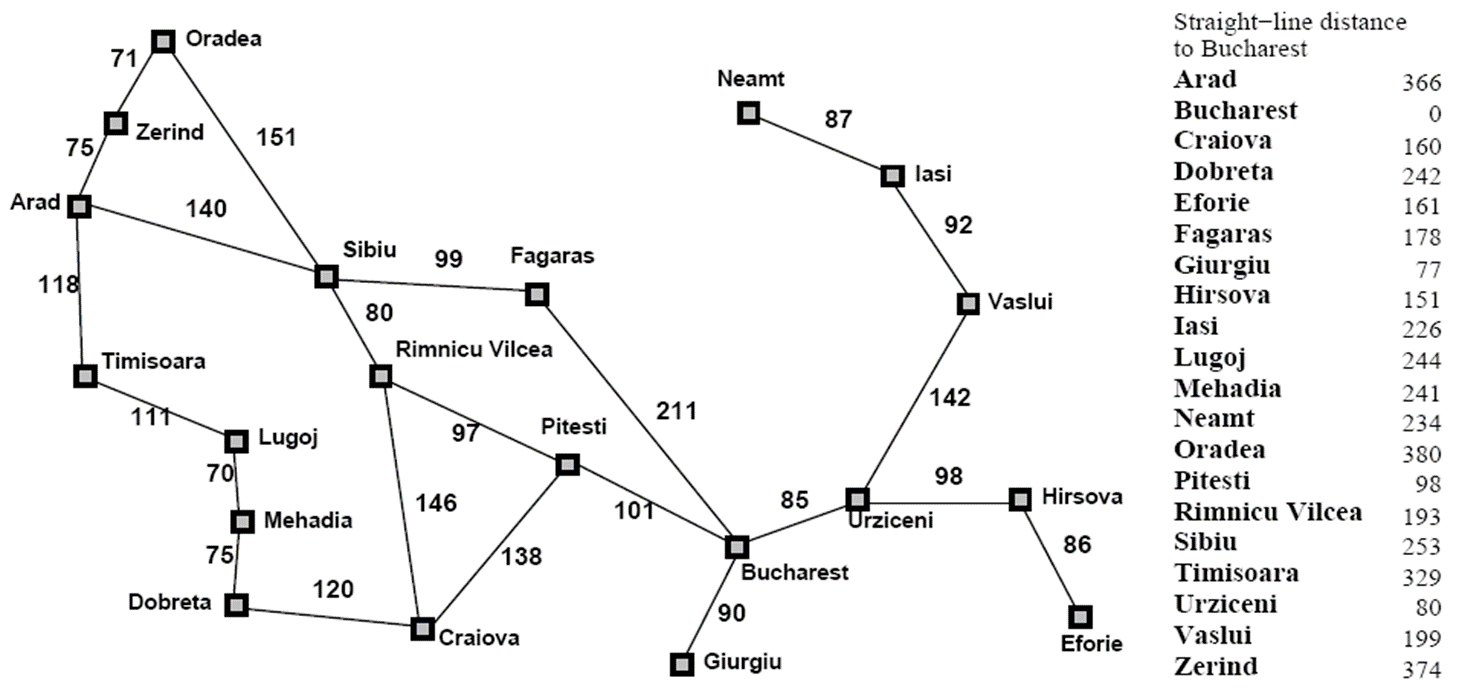

In [ ]:
def construct_graph(start, goal):
  init = start
  tree = {}
  left = 2*(init)
  right = 2*(init+1)
  if(left == goal or right == goal):
    return
  else: tree[init] = [left, right]
  construct_graph(left, goal)
  construct_graph(right, goal)

  return tree

In [ ]:
graph = {'Arad': [['Zerind', 374], ['Timisoara', 329], ['Sibiu', 253]],
         'Zerind': [['Oradea', 380], ['Arad', 366]],
         'Oradea': [['Sibiu', 253]],
         'Sibiu': [['Rimniciu Vilcea', 193], ['Fagaras', 178], ['Arad', 366]],
         'Fagaras': [['Sibiu', 253], ['Bucharest', 0]],
         'Rimniciu Vilcea': [['Pitesti', 98], ['Craiova', 160], ['Sibiu', 253]],
         'Timisoara': [['Lugoj', 244], ['Arad', 366]],
         'Lugoj': [['Mehadia', 241]],
         'Mehadia': [['Lugoj', 244], ['Dobreta', 242]],
         'Dobreta': [['Mehadia', 241], ['Craiova', 160]],
         'Pitesti': [['Craiova', 160], ['Bucharest', 0]],
         'Craiova': [['Pitesti', 98], ['Dobreta', 242], ['Rimniciu Vilcea', 193]],
         'Bucharest': [['Giurgiu', 77], ['Urziceni', 80], ['Fagaras', 178], ['Pitesti', 98]],
         'Giurgiu': [['Bucharest', 0]],
         'Urziceni': [['Vaslui', 199], ['Hirsova', 151], ['Bucharest', 0]],
         'Vaslui': [['Lasi', 226], ['Urziceni', 80]],
         'Lasi': [['Neamt', 234], ['Vaslui', 199]],
         'Neamt': [['Lasi', 226]],
         'Hirsova': [['Eforie', 161], ['Urziceni', 80]],
         'Eforie': [['Hirsova', 151]],
         }

from operator import itemgetter

def gbfs_traversal(graph, start, goal):
    opened = [start]
    closed = []
    while opened:
        node = opened.pop(0)
        print (node)
        if node[0] == goal[0]:
          closed.append(node[0])
          return closed
        else:
          closed.append(node[0])
          opened = opened + [item for item in graph[node[0]] if item not in opened and item not in closed]
        opened.sort(key=itemgetter(1))
    return 'GOAL Not FOUND'


print("GBFS")
gbfsPath = gbfs_traversal(graph, ['Arad'],['Bucharest'])
print(gbfsPath)


GBFS
['Arad']
['Sibiu', 253]
['Fagaras', 178]
['Bucharest', 0]
['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


# **Represent the following Tree using Python Dictionary Data Structure and  Apply A* Search Algorithm**

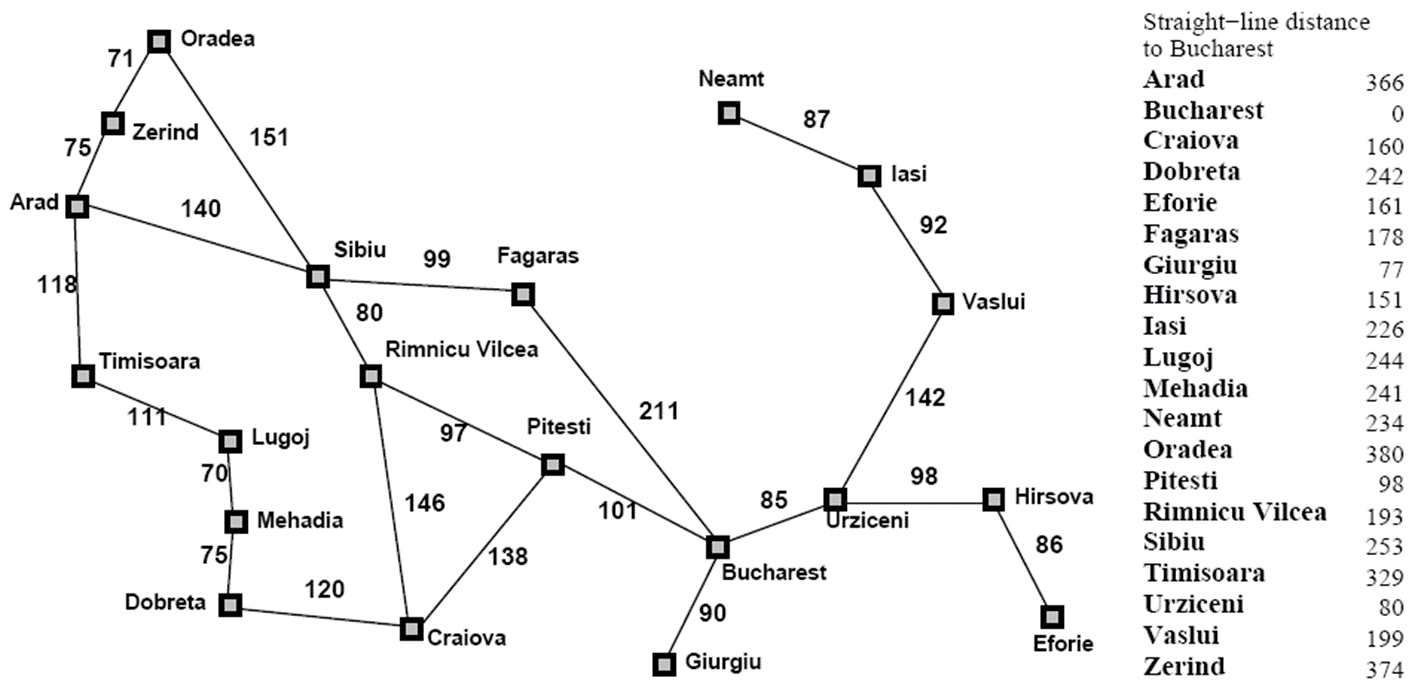

In [ ]:
from operator import itemgetter

graph = {'Arad': [['Zerind', 75, 374], ['Timisoara', 118, 329], ['Sibiu', 140, 253]],
         'Zerind': [['Oradea', 71, 380], ['Arad', 75, 366]],
         'Oradea': [['Zerind', 71, 374], ['Sibiu', 151, 253]],
         'Sibiu': [['Rimniciu Vilcea', 80, 193], ['Fagaras', 99, 176], ['Arad', 140, 366], ['Oradea', 151, 380]],
         'Fagaras': [['Sibiu', 99, 253], ['Bucharest', 211, 0]],
         'Rimniciu Vilcea': [['Pitesti', 97, 100], ['Craiova', 146, 160], ['Sibiu', 80, 253]],
         'Timisoara': [['Lugoj', 111, 244], ['Arad', 118, 366]],
         'Lugoj': [['Mehadia', 70, 241], ['Timisoara', 111, 329]],
         'Mehadia': [['Lugoj', 70, 244], ['Dobreta', 75, 242]],
         'Dobreta': [['Mehadia', 75, 241], ['Craiova', 120, 160]],
         'Pitesti': [['Craiova', 138, 160], ['Bucharest', 101, 0]],
         'Craiova': [['Pitesti', 138, 100], ['Dobreta', 120, 242], ['Rimniciu Vilcea', 146, 193]],
         'Bucharest': [['Giurgiu', 90, 77], ['Urziceni', 85, 80], ['Fagaras', 211, 178], ['Pitesti', 101, 100]],
         'Giurgiu': [['Bucharest', 90, 0]],
         'Urziceni': [['Vaslui', 142, 199], ['Hirsova', 98, 151], ['Bucharest', 85, 0]],
         'Vaslui': [['Lasi', 92, 226], ['Urziceni', 142, 80]],
         'Lasi': [['Neamt', 87, 234], ['Vaslui', 92, 199]],
         'Neamt': [['Lasi', 87, 226]],
         'Hirsova': [['Eforie', 86, 161], ['Urziceni', 98, 80]],
         'Eforie': [['Hirsova', 86, 151]], }

def astarik_traversal(graph, start, goal):
    opened = [start]
    closed = []
    while opened:
        node = opened.pop(0)
        print('current',node)
        if node[0] == goal[0]:
          closed.append(node)
          print('closed',closed)
          return [a[0] for a in closed]
        else:
            closed.append(node)
            opened = opened + [[item[0],closed[-1][1]+item[1],item[2]] for item in graph[node[0]] if item not in opened and item not in closed] #]
            print ('open',opened)
        opened.sort(key=lambda element:element[1]+element[2])
        print('sortedopen',opened)
    return 'GOAL Not FOUND'

print(astarik_traversal(graph, ['Arad', 0, 244], ['Bucharest', 0, 0]))


current ['Arad', 0, 244]
open [['Zerind', 75, 374], ['Timisoara', 118, 329], ['Sibiu', 140, 253]]
sortedopen [['Sibiu', 140, 253], ['Timisoara', 118, 329], ['Zerind', 75, 374]]
current ['Sibiu', 140, 253]
open [['Timisoara', 118, 329], ['Zerind', 75, 374], ['Rimniciu Vilcea', 220, 193], ['Fagaras', 239, 176], ['Arad', 280, 366], ['Oradea', 291, 380]]
sortedopen [['Rimniciu Vilcea', 220, 193], ['Fagaras', 239, 176], ['Timisoara', 118, 329], ['Zerind', 75, 374], ['Arad', 280, 366], ['Oradea', 291, 380]]
current ['Rimniciu Vilcea', 220, 193]
open [['Fagaras', 239, 176], ['Timisoara', 118, 329], ['Zerind', 75, 374], ['Arad', 280, 366], ['Oradea', 291, 380], ['Pitesti', 317, 100], ['Craiova', 366, 160], ['Sibiu', 300, 253]]
sortedopen [['Fagaras', 239, 176], ['Pitesti', 317, 100], ['Timisoara', 118, 329], ['Zerind', 75, 374], ['Craiova', 366, 160], ['Sibiu', 300, 253], ['Arad', 280, 366], ['Oradea', 291, 380]]
current ['Fagaras', 239, 176]
open [['Pitesti', 317, 100], ['Timisoara', 118, 329

# **Lab Tasks:**

# 1.   Evaluate the whether the code of A* algorithm is giving correct output or not. Indentify the logical errors in the provided code.
